In [22]:
import pickle

def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b

book_data = load_obj("processed_arr5.pickle")

In [2]:
for book in book_data[0:5]:
    print book

{'streak': '17', 'owi': '2908457233', 'title': 'THE EGYPTIAN', 'authors': ['Mika Waltari'], 'rank': '1', 'fast_subjects': {'Egypt': 1930, 'Akhenaton, King of Egypt': 52, 'Epic literature': 65, 'Historical fiction': 117}, 'year_pub': '1949', 'year': 1950, 'date': datetime.datetime(1950, 1, 1, 0, 0), 'genders': [{'gender': '', 'viaf': '111008219', 'name': 'Mika Waltari'}]}
{'streak': '11', 'owi': '4594164', 'title': 'MARY', 'authors': ['Sholem Asch'], 'rank': '2', 'fast_subjects': {'Mary, Blessed Virgin, Saint': 1651, 'Israel': 60, 'Christian women saints': 1523, 'Biographical fiction': 52, 'Middle East--Palestine': 1463, 'Christian fiction': 52, 'History of Biblical events': 1520, 'Bible.--New Testament': 1520}, 'year_pub': '1911', 'year': 1950, 'date': datetime.datetime(1950, 1, 1, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '56628030', 'name': 'Sholem Asch'}]}
{'streak': '18', 'owi': '570585', 'title': 'A RAGE TO LIVE', 'authors': ["John O'Hara"], 'rank': '3', 'fast_subjects': {'Sca

In [3]:
def is_book(x,book,fields):
    for f in fields:
        if x[f] != book[f]:
            return False
    return True

def find_book_in(book,ls,fields):
    for x in ls:
        if is_book(x,book,fields):
            return ls.index(x)
    return -1

def greater_than(book1,book2,f_to_max):
    try:
        f1 = int(book1[f_to_max])
        f2 = int(book2[f_to_max])
        if f_to_max == "rank":
            f1 = -f1
            f2 = -f2
        if f1>f2:
            return True
        else:
            return False
    except:
        return False

def get_unique_books_max(ls,u_fields,max_this):
    target =[]
    for book in ls:
        tar_index = find_book_in(book,target,u_fields)
        if tar_index>-1:
            tar_book = target[tar_index]
            if greater_than(book,tar_book,max_this):
                target[tar_index] = book
        else:
            target.append(book)
    return target
            


In [209]:
import random,pandas,matplotlib,re,math
%matplotlib inline

random.seed(0)
alph = re.compile('[^a-zA-Z]')
genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","erotic"],"stops":["language"]}, #took out 'domestic'
              "domestic":{"keys":["domestic"]},
              "suspense":{"keys":["suspense"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic"]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "historical":{"keys":["historical"]},
              #"ya/child":{"keys":["young adult","child","teen"]},
              #"war":{"keys":["war "]},
              #"religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "other":{"keys":["legal","young adult","child","teen","war ","religious","christian"],"stop":["aspects"]},
            }

suffixes = ['CPA', 'CSC', 'CSJ', 'DC', 'DD', 'DDS', 'DMD', 'DO', 'DVM', 'EDD', 'ESQ', 'II', 'III', 
            'IV', 'INC', 'JD', 'JR', 'LLD', 'LTD', 'MD', 'OD', 'OSB', 'PC', 'PE', 'PHD', 'RET', 
            'RGS', 'RN', 'RNC', 'SHCJ', 'SJ', 'SNJM', 'SR', 'SSMO', 'USA', 'USAF', 'USAFR', 'USAR', 
            'USCG', 'USMC', 'USMCR', 'USN', 'USNR']

def suffix(phrase):
    norm_phrase = phrase.replace(',',"").upper()
    if norm_phrase in suffixes:
        return True
    else:
        return False

def get_decade(year):
    frac = float(year)/10
    return int(math.floor(frac)*10)

def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in fast_term.lower():
            target = True
    for stop in stops:
        if stop in fast_term.lower():
            target = False
    return target

##when len(gender_ls) > 1, only returns the first author's viaf id
def get_viaf(gender_ls):
    if len(gender_ls) == 0:
        return ''
    return gender_ls[0]['viaf']

def last_name_recursive(name,last_index):
    if last_index == 0:
        return ""
    last_phrase = name[last_index]
    if not suffix(last_phrase):
        return last_phrase
    else:
        return last_name_recursive(name, last_index-1)

def get_last_name(name):
    names = name.split(" ")
    last_index = len(names)-1
    last = last_name_recursive(names,last_index)
    return last

stop = ["Creator","Translator","Editor","Publisher","Illustrator",
        "Narrator","Contributor","Commentator","Other"]

def is_author(authors,text):
    for x in authors:
        author = x.decode('utf-8')
        last_name = get_last_name(author)
        if (last_name!="") and (last_name.lower() in text.lower()):
            return True
    for x in stop:
        if x.lower() in text.lower():
            return False
    if authors == ['J. R. Ward']:
        print text
    return True

viaf_to_gender_dict = load_obj("viaf_gen_dict.pickle")
title_name_to_v = load_obj("author_to_viaf.pickle")

def fetch_gender(author,v):
    if len(v)==0:
        if author in title_name_to_v:
            v = title_name_to_v[author]
        else:
            v_input = raw_input("input viaf:")
            v = v_input
            title_name_to_v[author] = v
            write_obj(title_name_to_v,"author_to_viaf.pickle")
    if v in viaf_to_gender_dict:
        g = viaf_to_gender_dict[v]
        return g
    else:
        print author,v
        g = raw_input("input gender")
        viaf_to_gender_dict[v] = g
        write_obj(viaf_to_gender_dict,"viaf_gen_dict.pickle")
        return g
        

def class_gender(authors, gender_ls):
    if len(gender_ls) == 1:
        if gender_ls[0]['gender'] == "":
            g = fetch_gender(authors[0],gender_ls[0]['viaf'])
            if g=="No":
                print gender_ls,authors
            return g
        return gender_ls[0]['gender']
    else:
        fem = 0
        male = 0
        for x in gender_ls:
            if is_author(authors,x['name']):
                g = x['gender']
                if g == '':
                    g = fetch_gender(authors[0],x['viaf'])
                if g == 'Female':
                    fem = fem+1
                else:
                    if g == 'Male':
                        male = male+1
                    else:
                        if g == 'Both':
                            return Both
        if fem+male == 0:
            return 'needs label'
        ratio = float(fem)/float(fem+male)
        if len(gender_ls) < 4:
            if ratio == 1:
                return 'Female'
            if ratio == 0:
                return 'Male'
            return 'Both'
        else:
            if ratio >= .75:
                return 'Female'
            if ratio <= .25:
                return 'Male'
            return 'Both'

def select_genre(genre_hold):
    max_holds = []
    max_hold_count = 0
    for genre in genre_hold:
        current_hold_count = genre_hold[genre]
        if current_hold_count > max_hold_count:
            max_holds = [genre]
            max_hold_count = current_hold_count
        else:
            if current_hold_count == max_hold_count:
                max_holds.append(genre)
    if len(max_holds)==1:
        return max_holds[0]
    if len(max_holds)>1:
        return random.choice(max_holds)


def new_new_class_genre(subject_ls):
    primary_genres = {}
    for sub in subject_ls:
        hold = subject_ls[sub]
        if genre_candidate(sub):
            for genre in genre_dict:
                if is_genre(sub,genre):
                    if genre in primary_genres:
                        primary_genres[genre] = primary_genres[genre] + hold
                    else:
                        primary_genres[genre] = hold
    if len(primary_genres)>0:
        return select_genre(primary_genres)
    if len(subject_ls)>0:
        return "zz_no genre"
    else:
        return "zz_needs label"
        
def prep_dataframe(df):
    df = df.drop_duplicates(["title","year"])
    df.loc[:,"genre"] = df["fast_subjects"].apply(new_new_class_genre)
    df.loc[:,"gender"] = df.apply(lambda row:class_gender(row["authors"],row["genders"]), axis=1)
    return df

def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

In [97]:
viaf_set=set()
for x in mt:
    viaf_set.add(x[3]['viaf'])
print len(viaf_set)

259


In [206]:
#viaf_to_gender_dict = load_obj("viaf_gen_dict.pickle")
#title_name_to_v = load_obj("author_to_viaf.pickle")

owi_to_genre_dict = {}
mt3=[]

def is_genre(x):
    if x in genre_dict.keys():
        return x
    if x == "no":
        return "zz_no_genre"
    else:
        return "BAD INPUT"

for x in book_data:
    if len(x['fast_subjects'])==0:
        new_row = {'title':x['title'],'authors':x['authors'],'owi':x['owi']}
        if new_row not in mt3:
            mt3.append(new_row)

print len(mt3)

for x in mt3:
    print x
    while True:
        genre_input = raw_input("What genre?")
        genre = is_genre(genre_input)
        if genre != "BAD INPUT":
            break
    owi_to_genre_dict[x['owi']] = genre
            
    
    

75
{'authors': ['Robert Wilder'], 'owi': '104193589', 'title': 'WAIT FOR TOMORROW'}
What genre?no
{'authors': ['Helen Huntington Howe'], 'owi': '293921181', 'title': 'THE CIRCLE OF THE DAY'}
What genre?domestic
{'authors': ['charmian clift', 'george johnston'], 'owi': '2395156', 'title': 'HIGH VALLEY'}
What genre?no
{'authors': ['Susan Ertz'], 'owi': '3118592', 'title': 'THE PRODIGAL HEART'}
What genre?no
{'authors': ['Susan Yorke'], 'owi': '2140276', 'title': 'THE WIDOW'}
What genre?no
{'authors': ['Walter Karig'], 'owi': '2435045', 'title': 'CAROLINE HICKS'}
What genre?romance
{'authors': ['Anita Loos'], 'owi': '2084423', 'title': 'A MOUSE IS BORN'}
What genre?no
{'authors': ['harnett t. kane', 'victor leclerc'], 'owi': '2863535464', 'title': 'SCANDALOUS MRS.BLACKFORD'}
What genre?no
{'authors': ['Berry Fleming'], 'owi': '101335871', 'title': 'THE FORTUNE TELLERS'}


KeyboardInterrupt: 

In [163]:
title_name_to_v['Sheila Burnford']

'79021615'

In [124]:
write_obj(viaf_to_gender_dict,"viaf_gen_dict.pickle")
write_obj(title_name_to_v,"author_to_viaf.pickle")
print len(viaf_to_gender_dict)

258


[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892
gender      Both    Female      Male        NA        No  needs label
year                                                                 
1950    0.025000  0.275000  0.700000       NaN       NaN          NaN
1951         NaN  0.302083  0.697917       NaN       NaN          NaN
1952         NaN  0.310345  0.678161       NaN       NaN     0.011494
1953    0.026667  0.213333  0.760000       NaN       NaN          NaN
1954         NaN  0.283784  0.716216       NaN       NaN          NaN
1955         NaN  0.312500  0.687500       NaN       NaN          NaN
1956    0.012658  0.278481  0.696203  0.012658       NaN          NaN
1957    0.035714  0.261905  0.666667       NaN       NaN     0.035714
1958    0.037975  0.253165  0.683544       NaN       NaN     0.025316
1959    0.025974  0.233766  0.727273       NaN       NaN     0.012987
1960    0.013333  0.240000  0.746667      

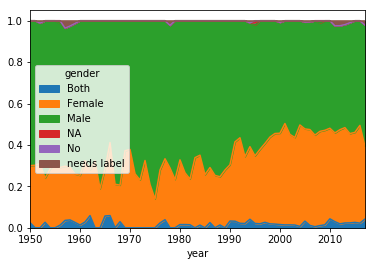

In [174]:
df = prep_dataframe(pandas.DataFrame(book_data))
df.loc[:,"decade"] = df["year"].apply(get_decade)
ndf = pandas.DataFrame({'count' : df.groupby( ["year", "gender"] ).size()}).reset_index()
year_totals = pandas.DataFrame({'sum' : df.groupby("year").size()})
ndf.loc[:,"percent"] = ndf.apply(lambda x: count_to_percent(x['count'], x['year'],year_totals), axis=1)
gender = ndf.pivot(index='year', columns='gender', values='percent')
print gender
gender.plot(kind="area")

Waltari, Mika, 1908-1979 ['Mika Waltari']
Asch, Sholem, 1880-1957 ['Sholem Asch']
Guthrie, A. B., Jr. (Alfred Bertram), 1901-1991 ['A.B. Guthrie Jr']
Moravia, Alberto, 1907-1990 ['Alberto Moravia']
Calliope, Tami ['Alberto Moravia']
Robbins, Harold, 1916-1997 ['Harold Robbins']
Paton, Alan [Inscriber] ['Alan Paton']
Amir, Aharon, 1923-2008 ['Alan Paton']
Streeter, Edward, 1891-1976 ['Edward Streeter']
Bristow, Gwen, 1903-1980 ['Gwen Bristow']
[{'gender': '', 'viaf': '20733682', 'name': 'White, Nelia Gardner, 1894-1957'}] ['Nelia Gardner White']
Ḳats, Pinye, 1882-1959 ['James Aldridge']
Aldridge, James, 1918-2015 ['James Aldridge']
Yu, Shusheng ['James Aldridge']
Walz, Jay ['Jay Walz']
Walz, Audrey ['Jay Walz']
Chatterton, Ruth, 1893-1961 ['Ruth Chatterton']
Clift, Charmian ['charmian clift', 'george johnston']
Johnston, George Henry, 1912-1970 [Author] ['charmian clift', 'george johnston']
Moravia, Alberto, 1907-1990 ['Alberto Moravia']
[{'gender': '', 'viaf': '51582732', 'name': 'Tasa

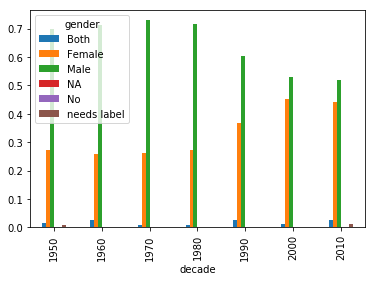

In [169]:
df = prep_dataframe(pandas.DataFrame(book_data))
df.loc[:,"decade"] = df["year"].apply(get_decade)
ndf = pandas.DataFrame({'count' : df.groupby( ["decade", "gender"] ).size()}).reset_index()
year_totals = pandas.DataFrame({'sum' : df.groupby("decade").size()})
ndf.loc[:,"percent"] = ndf.apply(lambda x: count_to_percent(x['count'], x['decade'],year_totals), axis=1)
gender = ndf.pivot(index='decade', columns='gender', values='percent')
print gender
gender.plot(kind="bar")



In [6]:
def explode_b_to_a(ls_of_books):
    target = []
    for book in ls_of_books:
        authors = book["genders"]
        new_row = dict(book)
        if len(authors)>1:
            for author in authors:
                new_row["genders"] = [author]
                target.append(new_row)
                new_row = dict(new_row)
        else:
            target.append(new_row)
    return target

author_data = explode_b_to_a(book_data)

gender    Female      Male  needs label
decade                                 
1950    0.241975  0.639506     0.118519
1960    0.220779  0.683983     0.095238
1970    0.256983  0.687151     0.055866
1980    0.312977  0.652672     0.034351
1990    0.362745  0.594771     0.042484
2000    0.442260  0.533170     0.024570
2010    0.461538  0.508159     0.030303


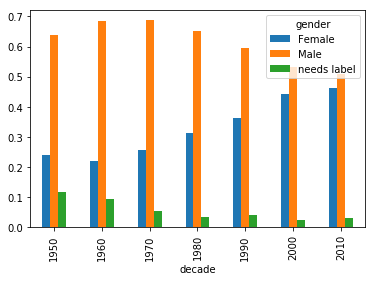

In [7]:
adf = prep_dataframe(pandas.DataFrame(author_data))
adf.loc[:,"viaf"] = adf["genders"].apply(get_viaf)
adf.loc[:,"decade"] = adf["year"].apply(get_decade)
adf = adf.drop_duplicates(["viaf","decade"])
ndf = pandas.DataFrame({'count' : adf.groupby( ["decade", "gender"] ).size()}).reset_index()
year_totals = pandas.DataFrame({'sum' : adf.groupby("decade").size()})
ndf.loc[:,"percent"] = ndf.apply(lambda x: count_to_percent(x['count'], x['decade'],year_totals), axis=1)
gender = ndf.pivot(index='decade', columns='gender', values='percent')
print gender
gender.plot(kind="bar")


genre  adventure  domestic   fsf  historical  horror  mystery  other  romance  \
year                                                                            
1950         2.0       NaN   NaN         1.0     NaN      NaN    3.0      3.0   
1951         3.0       NaN   NaN         3.0     NaN      2.0    3.0      1.0   
1952         5.0       2.0   1.0         1.0     1.0      2.0    2.0      4.0   
1953         4.0       3.0   1.0         2.0     NaN      1.0    2.0      4.0   
1954         1.0       4.0   NaN         4.0     NaN      2.0    4.0      1.0   
1955         1.0       2.0   1.0         2.0     NaN      1.0    2.0      NaN   
1956         3.0       1.0   NaN         1.0     NaN      NaN    1.0      4.0   
1957         4.0       3.0   2.0         2.0     NaN      NaN    3.0      7.0   
1958         2.0       3.0   1.0         3.0     NaN      1.0    2.0      6.0   
1959         2.0       NaN   NaN         1.0     NaN      2.0    4.0      5.0   
1960         1.0       1.0  

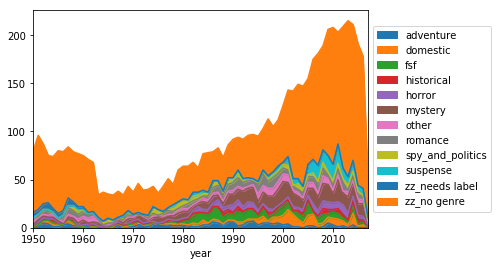

In [20]:
df = prep_dataframe(pandas.DataFrame(book_data))
df.loc[:,"viaf"] = df["genders"].apply(get_viaf)
ndf = pandas.DataFrame({'count' : df.groupby( ["year", "genre"] ).size()}).reset_index()
year_totals = pandas.DataFrame({'sum' : df.groupby("year").size()})
ndf.loc[:,"percent"] = ndf.apply(lambda x: count_to_percent(x['count'], x['year'],year_totals), axis=1)
genre = ndf.pivot(index='year', columns='genre', values='count')
print genre
genre.plot(kind="area")
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [21]:
print df_to_json(genre)

<type 'dict'>
[{'values': [[1041408000, 12.0], [852105600, 13.0], [568022400, 4.0], [599644800, 12.0], [504950400, 7.0], [536486400, 5.0], [441792000, 8.0], [473414400, 7.0], [-63129600, 1.0], [-31507200, 4.0], [315561600, 7.0], [347184000, 6.0], [-189360000, 1.0], [-157737600, 1.0], [-126201600, 2.0], [-94665600, 2.0], [-315590400, 5.0], [-283968000, 1.0], [-252432000, 2.0], [-220896000, 3.0], [820483200, 12.0], [1388563200, 15.0], [1483257600, 2.0], [1451635200, 13.0], [1293868800, 23.0], [1262332800, 10.0], [1357027200, 17.0], [1325404800, 12.0], [1420099200, 12.0], [1104566400, 7.0], [-473356800, 1.0], [-504892800, 2.0], [-410198400, None], [-441820800, None], [-599587200, 2.0], [-631123200, None], [-536428800, 1.0], [-568051200, 2.0], [378720000, 5.0], [-347126400, 2.0], [-378662400, 1.0], [410256000, 4.0], [662716800, 11.0], [631180800, 11.0], [725875200, 14.0], [694252800, 16.0], [788947200, 9.0], [757411200, 16.0], [284025600, 7.0], [252489600, 4.0], [220953600, 5.0], [18933120

In [182]:
def initials_as_first(author_data):
    name = author_data[0]["name"]
    periods = name.split('.')
    spaces = name.split(' ')
    if (len(periods[0]) == 1) or (len(spaces[0])==1):
        return True
    else:
        return False

ndf = prep_dataframe(pandas.DataFrame(book_data))
ndf.loc[:,"author_count"] = ndf["genders"].apply(len)
ndf.loc[:,"decade"] = ndf.loc[:,"year"].apply(get_decade)
ndf.loc[:,"viaf"] = ndf["genders"].apply(get_viaf)
ndf = ndf.drop_duplicates(["viaf","decade"])
single_authors = ndf[ndf["author_count"]==1]
#single_authors = single_authors[single_authors["genre"]=="zz_no genre"]
#single_authors = single_authors[single_authors["genre"]!="zz_needs label"]
ndf.loc[:,"viaf"] = ndf["genders"].apply(get_viaf)
#single_authors.loc[:,"initials"] = single_authors["genders"].apply(initials_as_first)
single_authors = pandas.DataFrame({'count' : single_authors.groupby( ["decade","gender"] ).size()}).reset_index()
#single_female = single_authors[single_authors["gender"]=="Female"]
single_authors = single_authors.pivot(index='decade', columns='gender', values='count')

single_authors

[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892


gender,Both,Female,Male,NA
decade,,,,
1950,NaN,106.0,241.0,1.0
1960,1.0,58.0,142.0,NaN
1970,NaN,43.0,106.0,NaN
1980,2.0,77.0,147.0,NaN
1990,3.0,104.0,150.0,1.0
2000,1.0,139.0,150.0,1.0
2010,NaN,133.0,134.0,NaN


In [186]:
max_ranks = get_unique_books_max(book_data,["title","authors"],"rank")

[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892
gender      Both    Female      Male        NA        No  needs label
rank                                                                 
1       0.028340  0.338731  0.628880       NaN       NaN     0.004049
2       0.019694  0.380744  0.595186       NaN       NaN     0.004376
3       0.022026  0.392070  0.583700       NaN       NaN     0.002203
4       0.015521  0.372506  0.611973       NaN       NaN          NaN
5       0.018919  0.424324  0.556757       NaN       NaN          NaN
6       0.002660  0.385638  0.606383       NaN       NaN     0.005319
7       0.015584  0.355844  0.620779       NaN       NaN     0.007792
8       0.023392  0.415205  0.561404       NaN       NaN          NaN
9       0.014164  0.427762  0.549575  0.002833  0.002833     0.002833
10      0.025316  0.430380  0.537975       NaN       NaN     0.006329
11      0.018450  0.376384  0.597786  0.00

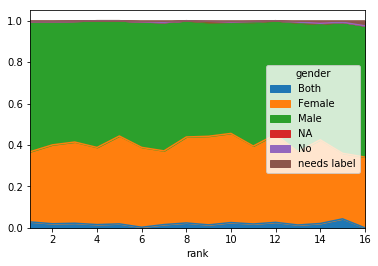

In [187]:
rank_df = pandas.DataFrame(max_ranks)
ndf = prep_dataframe(rank_df)
ndf.loc[:,"rank"] = pandas.to_numeric(ndf["rank"], errors='coerce')
ndf = ndf[ndf["rank"]!=0]
ndf.loc[:,"decade"] = ndf.loc[:,"year"].apply(get_decade)
rank_gender = pandas.DataFrame({'count' : ndf.groupby( ["rank", "gender"] ).size()}).reset_index()

rank_totals = pandas.DataFrame({'sum' : ndf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
print rank_gender
rank_gender.plot(kind="area")


In [183]:
def graph_gender_ratio_rank(odf,dec):
    odf = pandas.concat([(odf[odf["gender"] == "Male"]), (odf[odf["gender"] == "Female"])])
    rank_gender = pandas.DataFrame({'count' : odf.groupby( ["rank", "gender"] ).size()}).reset_index()
    rank_totals = pandas.DataFrame({'sum' : odf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]
    rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
    rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
    ax = rank_gender.plot(kind = "area")
    ax.set_title(str(dec)+'s')
    return ax


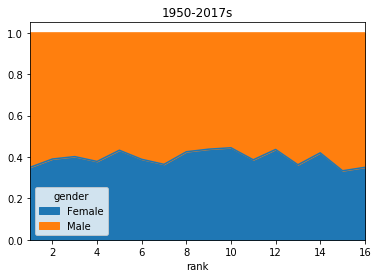

In [188]:
fig = graph_gender_ratio_rank(ndf,"1950-2017").get_figure()
#fig.savefig("proportion_of_women_by_rank.png")

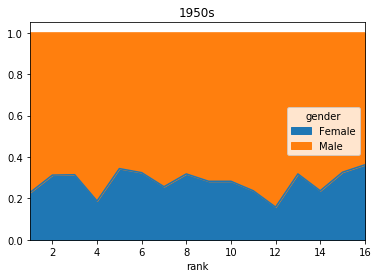

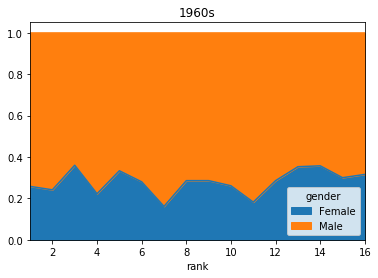

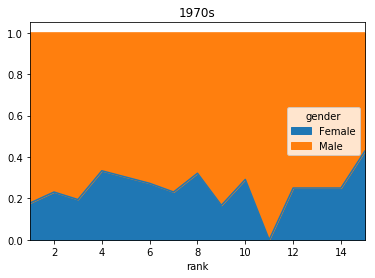

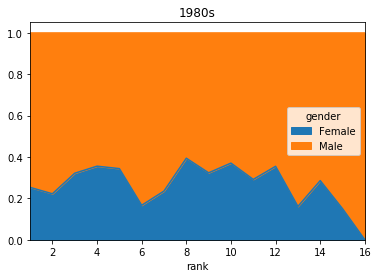

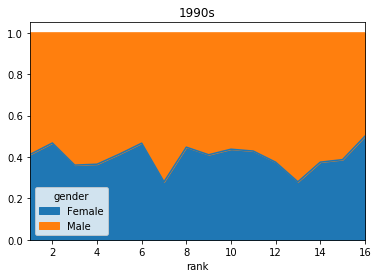

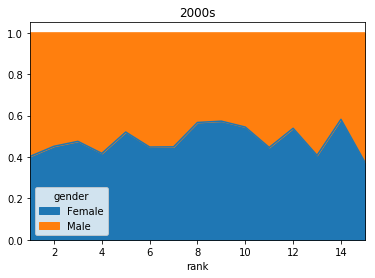

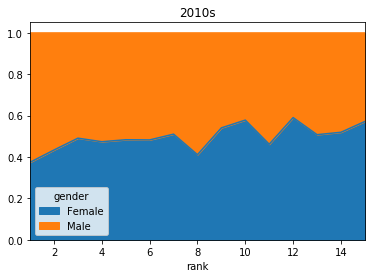

In [189]:
decades =[1950,1960,1970,1980,1990,2000,2010]
for decade in decades:
    #print decade 
    decade_frame = ndf[ndf["decade"]==decade]
    ax = graph_gender_ratio_rank(decade_frame,decade)

In [191]:
max_streaks = get_unique_books_max(book_data,["title","authors"],"streak")

[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892


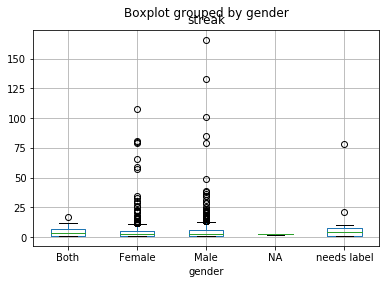

In [193]:
streak_df = pandas.DataFrame(max_streaks)
ndf = prep_dataframe(streak_df)
ndf.loc[:,"streak"] = pandas.to_numeric(ndf["streak"], errors='coerce')
ndf = ndf[ndf["year"]>2000]
fig = ndf.boxplot(column="streak",by="gender").get_figure()
fig.savefig("boxplot_streaks.png")
#ndf = ndf[ndf["streak"]>10]

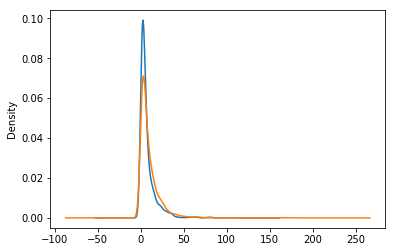

In [58]:
female = ndf[ndf["gender"]=="Female"]
male = ndf[ndf["gender"]=="Male"]
ax = female["streak"].plot.density()
fig = male["streak"].plot.density(ax=ax).get_figure()
fig.savefig("streak_density.png")

In [194]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
#book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["decade", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["decade", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

def multilayer_ctp(value,group_fs,totals_ls):
    i = 0
    layer = totals_ls
    for x in group_fs:
        next_layer = layer.loc[x]
        if i < (len(group_fs)-1):
            layer = pandas.DataFrame(next_layer)
            i = i+1
        else:
            layer = next_layer
    s = layer['sum']
    return float(value)/float(s)


books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['decade'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='decade', columns='genre', values='percent')
woman_counts

[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892
33


genre,adventure,domestic,fsf,historical,horror,mystery,other,romance,spy_and_politics,suspense,zz_needs label,zz_no genre
decade,,,,,,,,,,,,
1950,0.107143,0.611111,0.166667,0.368421,1.000000,0.166667,0.269231,0.371429,0.250000,0.500000,0.288462,0.263514
1960,NaN,0.100000,NaN,0.250000,0.333333,0.545455,0.240000,0.619048,0.050000,0.500000,0.333333,0.244048
1970,NaN,0.266667,NaN,0.125000,NaN,0.400000,0.250000,0.578947,0.085714,1.000000,NaN,0.284585
1980,0.121212,0.760000,0.150000,0.421053,0.100000,0.215385,0.037037,0.836735,0.062500,NaN,NaN,0.281899
1990,0.104167,0.761905,0.138889,0.458333,0.285714,0.451128,0.111111,0.802469,0.037037,0.157895,NaN,0.358575
2000,0.157895,0.770115,0.085714,0.518519,0.551020,0.469388,0.307692,0.830508,0.026316,0.252632,NaN,0.471620
2010,0.100000,0.717949,0.181818,0.840000,0.511111,0.442308,0.269231,0.805556,0.031250,0.185185,0.052632,0.462981


In [195]:
import numpy
type(numpy.nan)

float

In [196]:
ygenre_totals

sum
decade genre                 
1950   adventure           28
       domestic            18
       fsf                  6
       historical          19
       horror               1
       mystery             12
       other               26
       romance             35
       spy_and_politics    20
       suspense             2
       zz_needs label      52
       zz_no genre        592
1960   adventure            9
       domestic            10
       fsf                  4
       historical           8
       horror               3
       mystery             22
       other               25
       romance             21
       spy_and_politics    20
       suspense             2
       zz_needs label       9
       zz_no genre        336
1970   adventure           28
       domestic            15
       fsf                  9
       historical           8
       horror               9
       mystery             50
...                       ...
1990   other               54
       romance             81
       spy_and_politics    27
       suspense            19
       zz_needs label       1
       zz_no genre        449
2000   adventure           19
       domestic            87
       fsf                 70
       historical          27
       horror              49
       mystery            147
       other               52
       romance             59
       spy_and_politics    38
       suspense            95
       zz_needs label       2
       zz_no genre        969
2010   adventure           10
       domestic            39
       fsf                 33
       historical          25
       horror              45
       mystery            104
       other               26
       romance             36
       spy_and_politics    32
       suspense            81
       zz_needs label      19
       zz_no genre       1013

[84 rows x 1 columns]

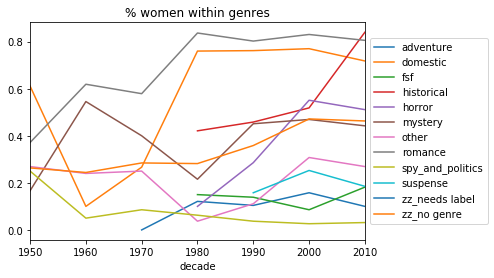

In [197]:
def not_enough_obs(y,g,tot_df,minimum):
    try:
        s = tot_df.loc[y].loc[g]["sum"]
        if s < minimum:
            return True
        else:
            return False
    except KeyError:
        return True
    
## Looks every entry up in the totals table, and if there are fewer
## than 10 observations, sets value to NaN
def filter_out_low_count(main_df,totals_df,min_obs):
    for year in main_df.index:
        genres = main_df.loc[year].index
        i = 0
        for percent in main_df.loc[year]:
            genre = genres[i]
            if not_enough_obs(year,genre,totals_df,min_obs):
                main_df.loc[year].loc[genre] = numpy.nan
            i = i+1

cleaning_woman = woman_counts.copy()
cleaning_woman = cleaning_woman.fillna(0)
filter_out_low_count(cleaning_woman,ygenre_totals,10)
cleaning_woman
ax = cleaning_woman.plot()
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title("% women within genres")
fig = ax.get_figure()
fig.savefig("percent_women_in_each_genre.png")

In [77]:
cleaning_woman

genre,adventure,domestic,fsf,historical,horror,mystery,romance,spy_and_politics,suspense,zz_needs label,zz_no genre
decade,,,,,,,,,,,
1950,0.103448,0.611111,NaN,0.347826,NaN,0.153846,0.361111,0.250000,NaN,0.211538,0.220949
1960,0.000000,0.000000,NaN,0.333333,NaN,0.545455,0.650000,0.050000,NaN,NaN,0.218487
1970,0.000000,0.266667,NaN,NaN,NaN,0.387755,0.600000,0.085714,NaN,NaN,0.264151
1980,0.111111,0.750000,0.156627,0.400000,0.100000,0.205882,0.800000,0.061224,NaN,NaN,0.257062
1990,0.098039,0.733333,0.121622,0.444444,0.285714,0.428571,0.800000,0.037037,0.190476,NaN,0.318182
2000,0.150000,0.752809,0.105263,0.518519,0.551020,0.407643,0.816667,0.025000,0.250000,NaN,0.451904
2010,0.090909,0.634146,0.187500,0.833333,0.510638,0.370370,0.794118,0.031250,0.202381,NaN,0.436069


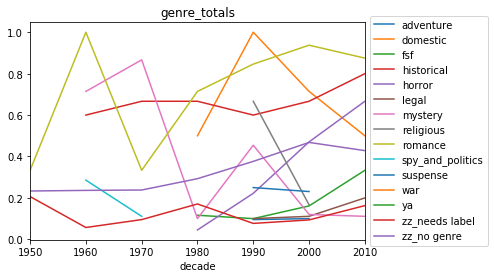

In [18]:
ax = woman_counts.plot()
ax.set_title("genre_totals")
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig = ax.get_figure()

In [212]:
print df_to_json(cleaning_woman)

<type 'dict'>
[{'values': [[631180800, 0.4511278195], [315561600, 0.2153846154], [-315590400, 0.5454545455], [28800, 0.4], [946713600, 0.4693877551], [-631123200, 0.1666666667], [1262332800, 0.4423076923]], 'key': u'mystery'}, {'values': [[631180800, 0.3585746102], [315561600, 0.2818991098], [-315590400, 0.244047619], [28800, 0.2845849802], [946713600, 0.471620227], [-631123200, 0.2635135135], [1262332800, 0.4629812438]], 'key': u'zz_no genre'}, {'values': [[631180800, None], [315561600, None], [-315590400, None], [28800, None], [946713600, None], [-631123200, 0.2884615385], [1262332800, 0.0526315789]], 'key': u'zz_needs label'}, {'values': [[631180800, 0.1388888889], [315561600, 0.15], [-315590400, None], [28800, None], [946713600, 0.0857142857], [-631123200, None], [1262332800, 0.1818181818]], 'key': u'fsf'}, {'values': [[631180800, 0.2857142857], [315561600, 0.1], [-315590400, None], [28800, None], [946713600, 0.5510204082], [-631123200, None], [1262332800, 0.5111111111]], 'key': u'

In [14]:
import time
import json
from datetime import datetime

def time_from_y(y):
    dt = datetime(year=int(y), month=1, day=1)
    tt = time.mktime(dt.timetuple())
    return int(tt)

def df_to_json(dataframe):
    j = dataframe.to_json()
    j = json.loads(j)
    print type(j)
    k = []
    for x in j:
        target = {}
        target["key"] = x
        v = []
        for y in j[x]:
            timey = time_from_y(y)
            value = j[x][y]
            point = [timey,value]
            v.append(point)
        target["values"] = v
        k.append(target)
    return k

In [42]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
#book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["year", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["year", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['year'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='year', columns='genre', values='percent')
woman_counts

3


genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
year,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272727,0.271186
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.243243
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166667,0.323529
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1.000000,NaN,NaN,0.200000,0.222222
1954,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.254237
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.225806
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,0.274194
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.250000,0.293103
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,0.500000,0.269841


In [21]:
ygenre_totals.loc[1960].loc["adventure"].loc["sum"]

3

In [137]:
ygenre_totals.to_csv("genre_totals_per_year.csv")
woman_counts.to_csv("percent_women_by_genre.csv")

[{'gender': '', 'viaf': '69610292', 'name': 'Ingoglia, Gina'}] ['Disney']
Tennyson, Alfred Tennyson, Baron, 1809-1892
gender  Both  Female   Male   NA   No  needs label
year                                              
1950     2.0    22.0   56.0  NaN  NaN          NaN
1951     NaN    29.0   67.0  NaN  NaN          NaN
1952     NaN    27.0   59.0  NaN  NaN          1.0
1953     2.0    16.0   57.0  NaN  NaN          NaN
1954     NaN    21.0   53.0  NaN  NaN          NaN
1955     NaN    25.0   55.0  NaN  NaN          NaN
1956     1.0    22.0   55.0  1.0  NaN          NaN
1957     3.0    22.0   56.0  NaN  NaN          3.0
1958     3.0    20.0   54.0  NaN  NaN          2.0
1959     2.0    18.0   56.0  NaN  NaN          1.0
1960     1.0    18.0   56.0  NaN  NaN          NaN
1961     2.0    21.0   48.0  NaN  NaN          NaN
1962     4.0    15.0   49.0  NaN  NaN          NaN
1963     NaN    11.0   23.0  NaN  NaN          NaN
1964     NaN     7.0   30.0  NaN  NaN          NaN
1965     2.0   

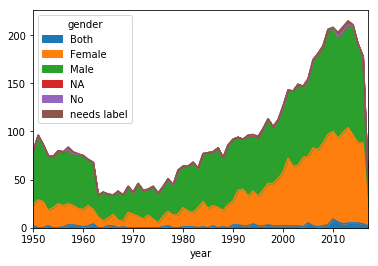

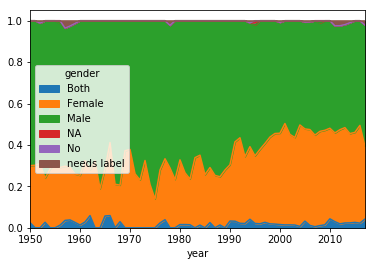

In [210]:
def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

ndf = pandas.DataFrame(book_data)
ndf = prep_dataframe(ndf)
gender_df = pandas.DataFrame({'count' : ndf.groupby( ["year", "gender"] ).size()}).reset_index()

year_totals = pandas.DataFrame({'sum' : ndf.groupby("year").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

gender_df.loc[:,"percent"] = gender_df.apply(lambda x: count_to_percent(x['count'], x['year'],year_totals), axis=1)
count_gender_df = gender_df.pivot(index='year', columns='gender', values='count')
print count_gender_df
count_gender_df.plot(kind="area")
perc_gender_df = gender_df.pivot(index='year', columns='gender', values='percent')
print perc_gender_df
perc_gender_df.plot(kind="area")


In [211]:
print df_to_json(count_gender_df)

<type 'dict'>
[{'values': [[1041408000, 2.0], [852105600, 3.0], [568022400, 1.0], [599644800, None], [504950400, 2.0], [536486400, None], [441792000, 1.0], [473414400, None], [-63129600, 1.0], [-31507200, None], [315561600, 1.0], [347184000, 1.0], [-189360000, None], [-157737600, 2.0], [-126201600, 2.0], [-94665600, None], [-315590400, 1.0], [-283968000, 2.0], [-252432000, 4.0], [-220896000, None], [820483200, 2.0], [1388563200, 5.0], [1483257600, 2.0], [1451635200, 4.0], [1293868800, 6.0], [1262332800, 9.0], [1357027200, 5.0], [1325404800, 4.0], [1420099200, 5.0], [1104566400, 5.0], [-473356800, None], [-504892800, None], [-410198400, 3.0], [-441820800, 1.0], [-599587200, None], [-631123200, 2.0], [-536428800, 2.0], [-568051200, None], [378720000, 1.0], [-347126400, 2.0], [-378662400, 3.0], [410256000, None], [662716800, 3.0], [631180800, 3.0], [725875200, 2.0], [694252800, 2.0], [788947200, 2.0], [757411200, 4.0], [284025600, None], [252489600, None], [220953600, 2.0], [189331200, 1.

In [ ]:
print df_to_json(perc_gender_df)